In [1]:
# imports
import pandas as pd
import numpy as np
import os


In [2]:
# data load
indir = '../data/raw/titanic/'
outdir = '../data/processed/titanic/'
train = pd.read_csv(indir+'train.csv')
test = pd.read_csv(indir+'test.csv')
df = train.append(test)


In [3]:
# summary
df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [4]:
# pivot table
df.pivot_table(['Age'],['Sex'])


,Age
Sex,
female,28.687088
male,30.585228


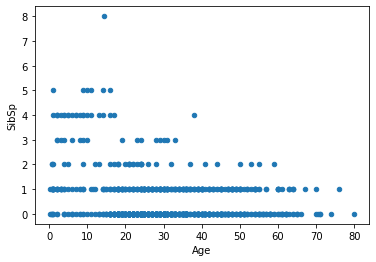

In [5]:
# scatterplot
df.plot.scatter('Age','SibSp')


In [6]:
# crosstab and pivot table
ct = pd.crosstab(df['Sex'],df['SibSp'])
gb = df.groupby(['Sex','SibSp']).size().unstack(fill_value=0)
pt = df.pivot_table(index='Sex',columns='SibSp',values='Age',aggfunc=len) # can't agg 'columns' column


In [7]:
# missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
# fill na embarked
display(df[df['Embarked'].isna()])
display(df.groupby(['Pclass','Embarked'])['Fare'].median())
df['Embarked'].fillna('C',inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [9]:
# fill na cabin
display(df[df['Cabin'].isna()])
df['Cabin'].fillna('null',inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
# fill na fare
display(df[df['Fare'].isna()])
df['Fare'].fillna(
    df[['Pclass','Embarked','Fare']]\
        .merge(
            df.groupby(
                ['Pclass','Embarked']
            )['Fare']\
            .median()\
            .reset_index()
            ,on=['Pclass','Embarked']
        )['Fare_y']
    ,inplace=True
)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,null,S


In [11]:
# fill na age
display(df[df['Age'].isna()])
df['Title'] = df['Name'].str.extract('.*?,(.*)\.')[0].str.lower()
df['Age'].fillna(
    df[['Sex','Embarked','Pclass','Age','Title']]\
        .merge(
            df.groupby(
                ['Sex','Embarked','Pclass','Title']
            )['Age']\
            .median()\
            .reset_index()
            ,on=['Sex','Embarked','Pclass','Title']
        )['Age_y']
    ,inplace=True
)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,null,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,null,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,null,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,null,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,null,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,null,Q
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,null,Q
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,null,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,null,S


In [12]:
# feature creationg & encoding
df['qual_Age'] = np.where(df['Age']>=18,'adult','child')
df['quan_FamSize'] = df['SibSp'] + df['SibSp']
df['quan_Mother'] = np.where((df['Sex']=='female') & (df['Parch']>0),1,0)
df['qual_Deck'] = np.where(~df['Cabin'].isna(),df['Cabin'].str[0],'N')
df['quan_Sex'] = np.where(df['Sex']=='male',1,0)
df = pd.get_dummies(df,columns=['qual_Deck','qual_Age','Embarked','Title'])
df.drop(['Cabin','Name','Sex','Parch','SibSp'],axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)


In [13]:
# write processed data
if not os.path.exists(outdir):
    os.mkdir(outdir)
df[df['Survived'].isna()].to_csv(outdir+'test.csv')
df[~df['Survived'].isna()].to_csv(outdir+'train.csv')
